Decision Tree Accuracy: 0.6356
Decision Tree Recall: 0.6002
Decision Tree F1 Score: 0.4036

Classification Report:
              precision    recall  f1-score   support

           1       0.10      0.50      0.17      9267
           2       0.93      0.62      0.74    830656
           3       0.40      0.75      0.52    169220
           4       0.11      0.54      0.19     25221

    accuracy                           0.64   1034364
   macro avg       0.39      0.60      0.40   1034364
weighted avg       0.82      0.64      0.69   1034364



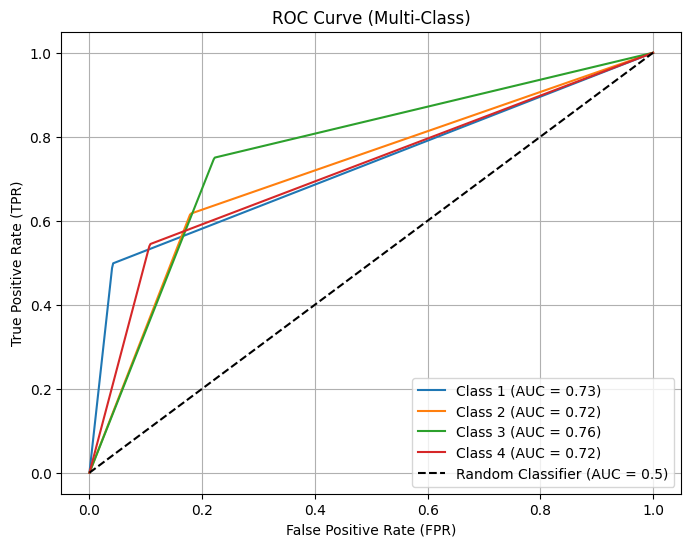

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from scipy.interpolate import interp1d 
import matplotlib.pyplot as plt


train_set_df = pd.read_csv("Train_set.csv")


X_train = train_set_df.drop(columns=["Severity"])
y_train = train_set_df["Severity"]


test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred, average='macro')
dt_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1 Score: {dt_f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

y_prob = model.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    
    interp_fpr = np.linspace(0, 1, num=500)
    interp_tpr = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(interp_fpr)
    
    auc_value = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(interp_fpr, interp_tpr, label=f"Class {cls} (AUC = {auc_value:.2f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.5)")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (Multi-Class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


train_set_df = pd.read_csv("Train_set.csv")

X_train = train_set_df.drop(columns=["Severity"])
y_train = train_set_df["Severity"]


train_set_df = pd.read_csv("Test_set.csv")

X_test = train_set_df.drop(columns=["Severity"])
y_test = train_set_df["Severity"]

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



y_pred = model.predict(X_test)


rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred, average='macro')
rf_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Random Forest F1 Score: {rf_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


y_test_bin = label_binarize(y_test, classes=np.unique(y_train))  # Convert to binary labels for each class
n_classes = y_test_bin.shape[1]

y_prob = model.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Macro-average ROC curve
fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-class) - One-vs-Rest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Initialize the LabelEncoder
label_encoder = LabelEncoder()


train_set_df = pd.read_csv("Train_set.csv")


X_train = train_set_df.drop(columns=["Severity"])
y_train = label_encoder.fit_transform(train_set_df["Severity"])


test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable for the test set
X_test = test_data.drop(columns=["Severity"])
y_test = label_encoder.fit_transform(train_set_df["Severity"])


size: int = min(len(X_test), len(X_train))

X_train, y_train, X_test, y_test = X_train[:size], y_train[:size], X_test[:size], y_test[:size]


model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred, average='macro')
xgb_f1 = f1_score(y_test, y_pred, average='macro')

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Recall: {xgb_recall:.4f}")
print(f"XGBoost F1 Score: {xgb_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


y_test_bin = label_binarize(y_test, classes=np.unique(y_train))  # Convert to binary labels for each class
n_classes = y_test_bin.shape[1]

y_prob = model.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Macro-average ROC curve
fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-class) - One-vs-Rest')
plt.legend(loc='lower right')
plt.show()

XGBoost Accuracy: 0.4740
XGBoost Recall: 0.3327
XGBoost F1 Score: 0.3224


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import top_k_accuracy_score, average_precision_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


train_set_df = pd.read_csv("Train_set.csv")

X_train = train_set_df.drop(columns=["Severity"])
y_train = train_set_df["Severity"]


train_set_df = pd.read_csv("Test_set.csv")

X_test = train_set_df.drop(columns=["Severity"])
y_test = train_set_df["Severity"]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


y_test_bin = label_binarize(y_test, classes=np.unique(y_train))  # Convert to binary labels for each class
n_classes = y_test_bin.shape[1]

y_prob = model.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Macro-average ROC curve
fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-class) - One-vs-Rest')
plt.legend(loc='lower right')
plt.show()